In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(category=FutureWarning, action='ignore')

df = pd.read_csv('project_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12207 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12146 non-null  float64
 13  Region                   12084 non-null  float64
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,NaN,1.0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2.0,NaN,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1.0,NaN,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2.0,2.0,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3.0,1.0,4,Returning_Visitor,True,False


## Dataset Introduction

| Feature                 | Description                                                                                                                                                                                            | Role     | Type        | Missing Values |
|-------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------|-------------|----------------|
| Administrative          | This is the number of pages of this type (administrative) that the user visited.                                                                                                                       | Feature  | Integer     | no             |
| Administrative_Duration | This is the amount of time spent in this category of pages.                                                                                                                                            | Feature  | Integer     | no             |
| Informational           | This is the number of pages of this type (informational) that the user visited.                                                                                                                         | Feature  | Integer     | no             |
| Informational_Duration  | This is the amount of time spent in this category of pages.                                                                                                                                            | Feature  | Integer     | no             |
| ProductRelated          | This is the number of pages of this type (product related) that the user visited.                                                                                                                       | Feature  | Integer     | no             |
| ProductRelated_Duration | This is the amount of time spent in this category of pages.                                                                                                                                            | Feature  | Continuous  | no             |
| BounceRates             | The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.                                                                                   | Feature  | Continuous  | no             |
| ExitRates               | The percentage of pageviews on the website that end at that specific page.                                                                                                                              | Feature  | Continuous  | no             |
| PageValues              | The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.                                                                            | Feature  | Integer     | no             |
| SpecialDay              | This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized.                     | Feature  | Integer     | 123            |
| Month                   | Contains the month the pageview occurred, in string form.                                                                                                                                              | Feature  | Categorical | no             |
| OperatingSystems        | An integer value representing the operating system that the user was on when viewing the page.                                                                                                         | Feature  | Integer     | no             |
| Browser                 | An integer value representing the browser that the user was using to view the page.                                                                                                                    | Feature  | Integer     | 184            |
| Region                  | An integer value representing which region the user is located in.                                                                                                                                     | Feature  | Integer     | 246            |
| TrafficType             | An integer value representing what type of traffic the user is categorized into.                                                                                                                       | Feature  | Integer     | no             |
| VisitorType             | A string representing whether a visitor is New Visitor, Returning Visitor, or Other.                                                                                                                   | Feature  | Categorical | no             |
| Weekend                 | A boolean representing whether the session is on a weekend.                                                                                                                                            | Feature  | Binary      | no             |
| Revenue                 | A boolean representing whether or not the user completed the purchase.                                                                                                                                 | Target   | Binary      | 147            |


## Data Cleaning

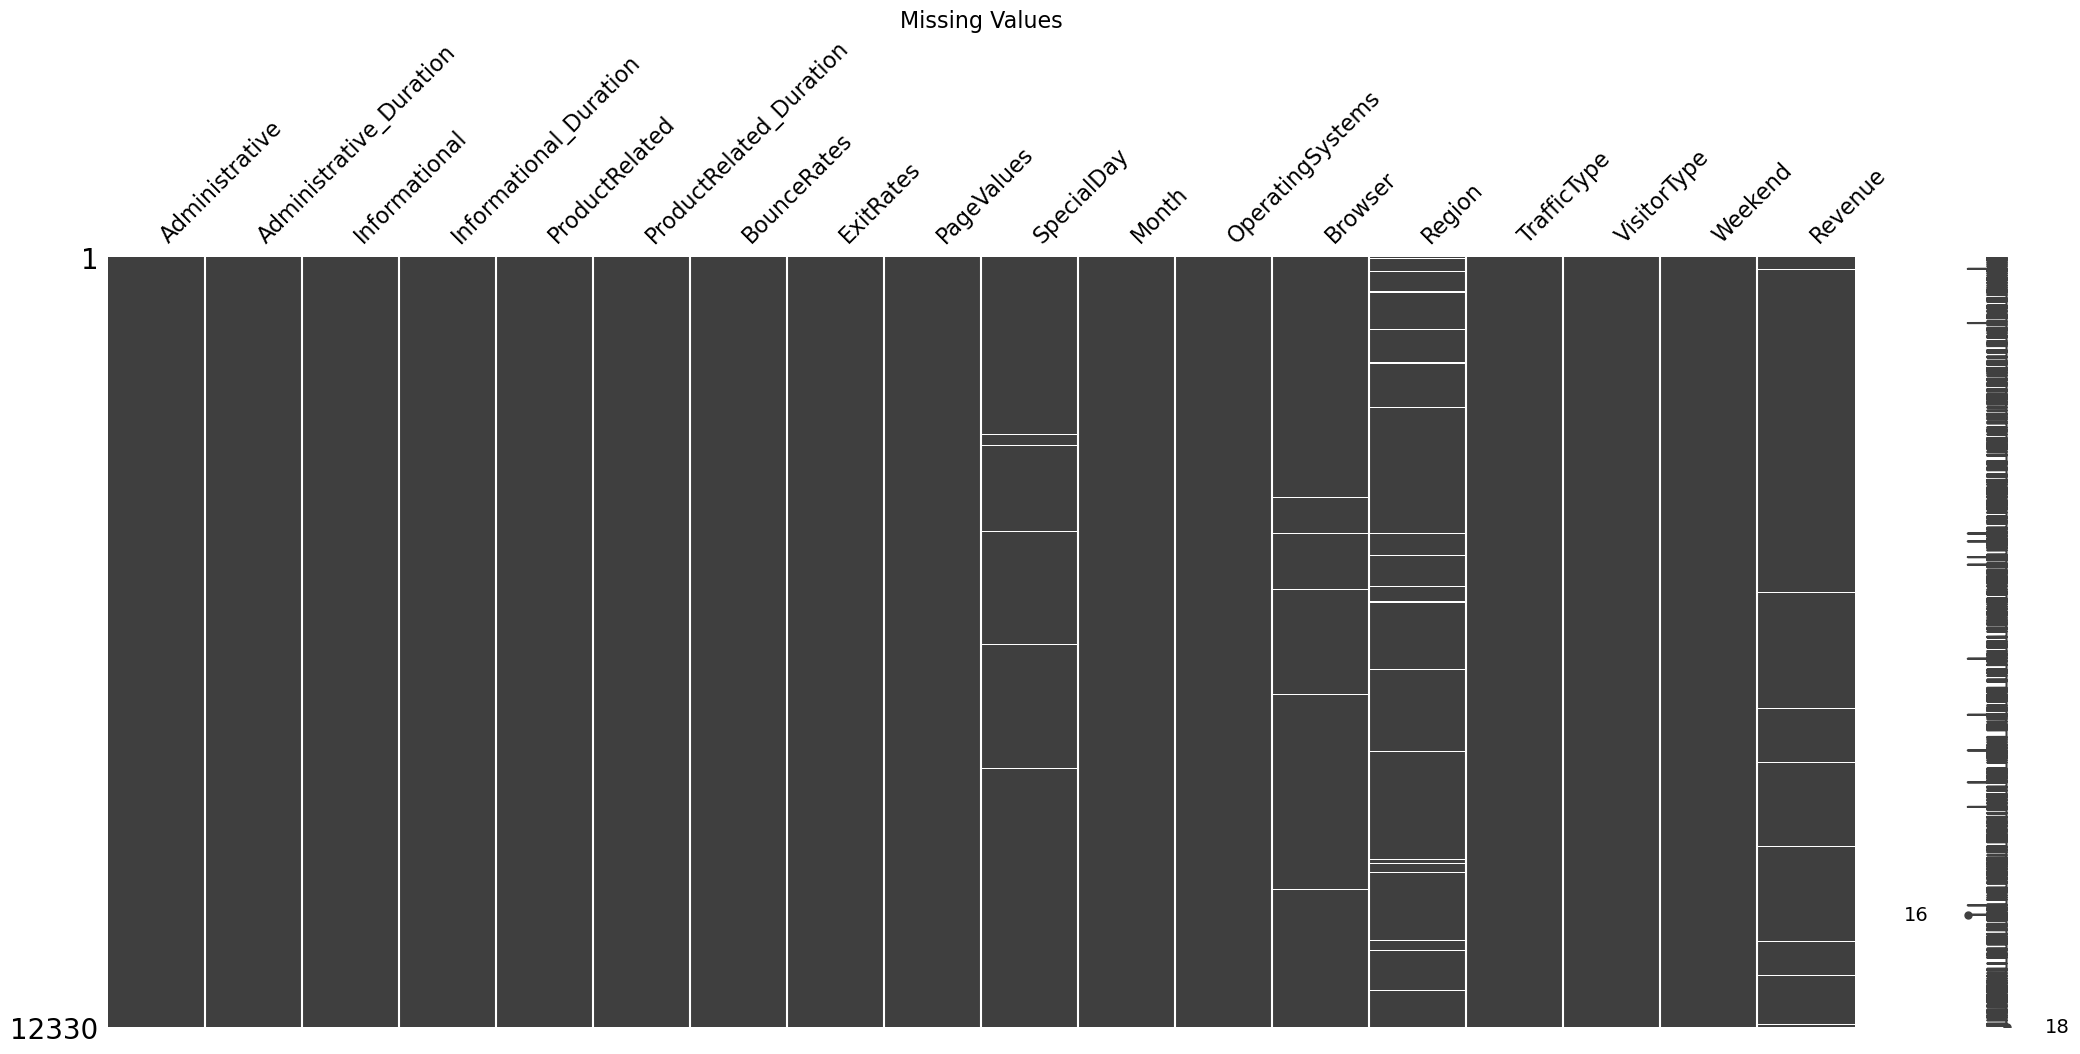

In [2]:
import missingno as msno

# Visualize the missing data
msno.matrix(df)
plt.title('Missing Values', fontsize=16)
plt.show()

In [3]:
# Missing values in target are not feasible and are dropped
missing_values_target = df['Revenue'].isna().sum()
df.dropna(subset=['Revenue'], inplace=True)
print(f"\nDropped {missing_values_target} rows with missing target values.")

# Likewise goes for duplicated rows
duplicate_rows_dropped = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"\nDropped {duplicate_rows_dropped} duplicate rows.")


Dropped 147 rows with missing target values.

Dropped 92 duplicate rows.


In [4]:
# Calculate the impact of dropping rows with missing values
df_temp = df.copy()
rows_before_drop = len(df_temp)
df_temp.dropna(inplace=True)
rows_dropped = rows_before_drop - len(df_temp)
percentage_dropped = (rows_dropped / rows_before_drop) * 100
print(f"\nImpact of dropping all rows with missing values: {rows_dropped} rows ({percentage_dropped:.2}% of the dataset)")


Impact of dropping all rows with missing values: 540 rows (4.5% of the dataset)


### Missing values in 'Region', 'Browser', and 'SpecialDay' columns
- The 'Region', 'Browser', and 'SpecialDay' columns contain categorical data
- There are missing values (NaN) in these columns

**Assessment**: As these columns contain categorical data, missing values cannot be easily imputed without additional context. Removing the rows with missing data may result in loss of potentially valuable information.

**Action**: We will keep the missing values for now. During preprocessing, we will consider introducing an 'Unknown' category to represent them. The impact of this 'Unknown' category on the model's performance will guide our decision to keep it, impute the missing values, or remove the affected rows/columns.


In [5]:
# Missing value columns
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)

Region        244
Browser       182
SpecialDay    122
dtype: int64

In [6]:
# Potential future action for preprocessing pipeline
# df[['Region', 'Browser', 'SpecialDay']] = df[['Region', 'Browser', 'SpecialDay']].fillna('Unknown')

### Inspecting Subcategories
When inspecting the subcategories for the object data, we notice some atypical values that will be addressed in the upcoming sections.

In [7]:
# Categorical unique values
object_cols = df.select_dtypes("object")
for i in object_cols:
    print(f"{i}")
    print(df[i].unique())
    print("")

Month
['Feb' 'Mar' 'May' 'Turc' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Sept'
 'Dec']

VisitorType
['Returning_Visitor' 'New_Visitor' 'Other']

Weekend
['False' 'True' 'Name:Zara']

Revenue
[False True]



### Unexpected Values in 'Month'
- There is an unexpected value "Turc" in the 'Month' column
- September is represented under two seperate categories: "Sep" and "Sept"
- The months "Jan" and "April" are missing

**Assessment**: Without additional context, we cannot make assumptions about what "Turc" represents. These rows could belong to any month, including January, February, or others.

**Action**: To prevent erroneous interpretations, these "Turc" entries in month will be replaced with NaN values. Similar to the previous section, we may consider relabeling "Turc" as "Unknown" if it demonstrates predictive significance. "Sep" and "Sept" is consolidated.

In [8]:
month_counts = df['Month'].value_counts()
for month, count in month_counts.items():
    print(f'Month "{month}" count: {count}')

Month "May" count: 3131
Month "Nov" count: 2951
Month "Mar" count: 1852
Month "Dec" count: 1689
Month "Oct" count: 545
Month "Aug" count: 427
Month "Jul" count: 426
Month "Sep" count: 353
Month "June" count: 283
Month "Feb" count: 179
Month "Turc" count: 168
Month "Sept" count: 87


In [9]:
# Relabel 'Turc' to NaN
df['Month'] = df['Month'].replace('Turc', pd.NA)

# Consolidate "Sept" with "Sep"
df['Month'] = df['Month'].replace('Sept', 'Sep')

In [10]:
print(f"There is now {df['Month'].isna().sum()} additional missing values.")

There is now 168 additional missing values.


### Weekend: Handling Unexpected 'Name:Zara' Value
The 'Weekend' feature should be binary, but 189 rows contain the unexpected value 'Name:Zara'.

**Assessment**: The presence of 'Name:Zara' in a binary feature is concerning and may indicate erroneous entries.

**Preprocessing Options**:
- Drop the 'Weekend' feature if it lacks predictive value.
- If valuable we can consider imputation or dropping rows with unknown 'Weekend' values.

**Action**: Replace 'Name:Zara' with NaN in the 'Weekend' feature for now, allowing further investigation and preprocessing decisions.

In [11]:
df['Weekend'].value_counts()

Weekend
False        9081
True         2826
Name:Zara     184
Name: count, dtype: int64

In [12]:
# Relabel 'Name:Zara' to NaN
df['Weekend'] = df['Weekend'].replace('Name:Zara', pd.NA)

### Investigation of Anomalies in Continuous Features
Descriptive statistics reveal anomalies in the following features:
- 'Administrative' contains 123 negative values.
- 'BounceRates' contains 363 negative values.

These anomalies may stem from data entry errors, measurement or tracking issues, or system bugs.

Unfortunately, within the confines of this dataset alone, it's impossible to determine the intended values for these anomalies. Therefore, they will be treated as NaN values.

The handling of these 486 missing values will be explored further during the preprocessing pipeline.

In [13]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12091.000000,12091.000000,12091.000000,12091.000000,12091.000000,12091.000000,12091.000000,12091.000000,12091.000000,11969.000000,12091.000000,11909.000000,11847.000000,12091.000000
mean,2.254983,1293.862319,0.507071,34.699421,31.944256,1203.140449,0.043189,0.041943,5.921890,0.061826,2.124225,2.358972,3.147970,4.081217
std,3.418783,34406.147068,1.271568,141.381512,44.552279,1920.334676,0.240376,0.046898,18.584783,0.199533,0.907893,1.713439,2.402297,4.027246
min,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.498680,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,191.000000,0.000000,0.014285,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,606.200000,0.002740,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.650000,0.000000,0.000000,38.000000,1474.500000,0.017188,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,989493.000000,24.000000,2549.375000,705.000000,63973.522230,2.098952,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
pd.options.display.max_rows = 140

admin_missing = df.loc[df['Administrative'] < 0, 'Administrative'].count()
bounce_missing = df.loc[df['BounceRates'] < 0, 'BounceRates'].count()
numerical_feat_total_missing = admin_missing + bounce_missing

print(f"'Administrative' negative values: {admin_missing}")
print(f"'BounceRates' negative values: {bounce_missing}")
print(f"Total negative values for numerical features: {numerical_feat_total_missing}")

'Administrative' negative values: 122
'BounceRates' negative values: 357
Total negative values for numerical features: 479


In [15]:
# Replace negative values with NaN
df.loc[df['Administrative'] < 0, 'Administrative'] = pd.NA
df.loc[df['BounceRates'] < 0, 'BounceRates'] = pd.NA

### Optimizing Memory Usage
By converting columns to appropriate data types and downcasting them, we significantly reduced the dataset's memory footprint from 1.7+ MB to 577.1 KB (66% reduction). The key steps include:

1. Dropping missing values (`df.dropna()`)
   > Note: The handling of missing values here might differ from the approach used in the modeling phase.
2. Converting specific columns to integer, float, and boolean types
3. Downcasting float, integer, and object columns using the `downcast_dtypes()` function

This optimization leads to:
- Reduced memory consumption
- Improved code performance
- Enhanced data understanding

The memory-optimized dataset facilitates more efficient and effective exploratory data analysis.

In [16]:
print(type(df['Weekend'][1]))
print(type(df['Revenue'][1]))

<class 'str'>
<class 'bool'>


In [17]:
# Drop missing values
df.dropna(inplace=True)

# Reset df index
df.reset_index(drop=True, inplace=True)

def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    object_cols = [c for c in df if df[c].dtype == "object"]
    
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    df[object_cols] = df[object_cols].astype("category")
    
    return df

# Convert columns to integer type
int_columns = ['Administrative', 'Informational', 'ProductRelated', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
df[int_columns] = df[int_columns].astype(int)

# Convert columns to float type
float_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
df[float_columns] = df[float_columns].astype(float)

# Convert object 'Weekend' and boolean 'Revenue' to numeric representation
df['Weekend'] = df['Weekend'].map({'True': 1, 'False': 0})
df['Revenue'] = df['Revenue'].map({True: 1, False: 0})

# Downcast integer and float columns
df = downcast_dtypes(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           10763 non-null  int16   
 1   Administrative_Duration  10763 non-null  float32 
 2   Informational            10763 non-null  int16   
 3   Informational_Duration   10763 non-null  float32 
 4   ProductRelated           10763 non-null  int16   
 5   ProductRelated_Duration  10763 non-null  float32 
 6   BounceRates              10763 non-null  float32 
 7   ExitRates                10763 non-null  float32 
 8   PageValues               10763 non-null  float32 
 9   SpecialDay               10763 non-null  float32 
 10  Month                    10763 non-null  category
 11  OperatingSystems         10763 non-null  int16   
 12  Browser                  10763 non-null  int16   
 13  Region                   10763 non-null  int16   
 14  Traffi

### Data Cleaning Summary
After thorough data cleaning, we have encountered several inconsistencies within the dataset. The initial count of 540 missing values, not accounting for duplicated rows and missing values in the target, has doubled, resulting in a total of 1158 values (9.6% of the dataset).

## EDA
### Feature Type Analysis
The table below presents the results of the feature type analysis, classifying features into appropriate types. Two key points to consider for the upcoming modeling phase:

- Categorical features must be encoded during preprocessing, even if they are numerical in data type:
  - Some features, like 'SpecialDay', are float but represent ordinal categorical data, indicating the closeness of browsing date to special days.
  - Other numeric categorical features, such as 'OperatingSystems', are placeholders for nominal categories without inherent order.
- Sparse numeric discrete features with few unique values may perform poorly. Encoding these features could potentially improve their predictive power.

In [20]:
from great_tables import GT, md, html

# Feature Classification and Metadata Summary
def create_feature_lists(data, custom_features=None):
    '''Generate lists of features based on their types and metadata'''
    
    NUM_FEAT = [feature for feature in data.select_dtypes(include=np.number).columns]
    CONT_FEAT = [feature for feature in NUM_FEAT if data[feature].dtype in ['float64', 'float32', 'float16'] and len(data[feature].unique()) >= 25]
    DISC_FEAT = [feature for feature in NUM_FEAT if data[feature].dtype in ['int64', 'int32', 'int16', 'int8']]
    CAT_FEAT = [feature for feature in data.columns if data[feature].dtype in ['object', 'category', 'bool'] 
            and len(data[feature].unique()) < 13] + [feature for feature in NUM_FEAT if data[feature].dtype in ['float64', 'float32', 'float16'] and len(data[feature].unique()) < 25]
    BINARY_FEAT = [feature for feature in CAT_FEAT if len(data[feature].unique()) == 2] + \
              [feature for feature in NUM_FEAT if len(data[feature].unique()) == 2]

    return NUM_FEAT, CONT_FEAT, DISC_FEAT, CAT_FEAT, BINARY_FEAT, custom_features

# Custom features dictionary
custom_features = {
    'Administrative': {'FeatureType': 'Numeric', 'SubType': 'Discrete'},
    'SpecialDay': {'FeatureType': 'Categorical', 'SubType': 'Ordinal'},
    'Month': {'FeatureType': 'Categorical', 'SubType': 'Ordinal'},
    'Browser': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'OperatingSystems': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'Region': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'TrafficType': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'Region': {'FeatureType': 'Categorical', 'SubType': 'Nominal'},
    'VisitorType': {'FeatureType': 'Categorical', 'SubType': 'Nominal'}
}

# Run Create Feature List Function
num_feat, cont_feat, disc_feat, cat_feat, binary_feat, custom_features = create_feature_lists(df, custom_features)

# Creating a dataframe to store the feature metadata
feature_df = pd.DataFrame(index=df.columns, 
                          columns=['Feature', 'DataType', 'UniqueValues', 'FeatureType', 'SubType'])

# Overview of unique values and feature type
for col in df.columns:
    feature_df.loc[col, 'Feature'] = col
    feature_df.loc[col, 'DataType'] = df[col].dtype
    
    if isinstance(df[col].dtype, pd.CategoricalDtype):
        unique_values = df[col].cat.categories.tolist()[:6] + ['...']
    else:
        unique_values = df[col].unique()
        if len(unique_values) > 6:
            unique_values = unique_values[:6].tolist() + ['...']
    
    if col in cont_feat:
        feature_df.loc[col, 'UniqueValues'] = len(df[col].unique())
    else:
        feature_df.loc[col, 'UniqueValues'] = unique_values
    
    if col in custom_features:
        feature_df.loc[col, 'FeatureType'] = custom_features[col]['FeatureType']
        feature_df.loc[col, 'SubType'] = custom_features[col]['SubType']
    elif col in num_feat:
        feature_df.loc[col, 'FeatureType'] = "Numeric"
        if col in binary_feat:
            feature_df.loc[col, 'SubType'] = "Binary"
        elif col in cont_feat:
            feature_df.loc[col, 'SubType'] = "Continuous"
        elif col in disc_feat:
            feature_df.loc[col, 'SubType'] = "Discrete"
    elif col in cat_feat:
        feature_df.loc[col, 'FeatureType'] = "Categorical"
        if col in binary_feat:
            feature_df.loc[col, 'SubType'] = "Binary"
        else:
            feature_df.loc[col, 'SubType'] = "Nominal_or_Ordinal"

# Create a display table
(
    GT(feature_df, rowname_col="Feature")
    .tab_header(
        title="Feature Metadata Summary",
        subtitle="Descriptive Overview of Dataset Features and Types"
    )
 
)

GT(_tbl_data=                                         Feature  DataType  \
Administrative                    Administrative     int16   
Administrative_Duration  Administrative_Duration   float32   
Informational                      Informational     int16   
Informational_Duration    Informational_Duration   float32   
ProductRelated                    ProductRelated     int16   
ProductRelated_Duration  ProductRelated_Duration   float32   
BounceRates                          BounceRates   float32   
ExitRates                              ExitRates   float32   
PageValues                            PageValues   float32   
SpecialDay                            SpecialDay   float32   
Month                                      Month  category   
OperatingSystems                OperatingSystems     int16   
Browser                                  Browser     int16   
Region                                    Region     int16   
TrafficType                          TrafficType     int16   
VisitorType                          VisitorType  category   
Weekend                                  Weekend     int16   
Revenue                                  Revenue     int16   

                                                         UniqueValues  \
Administrative                               [0, 1, 4, 2, 12, 3, ...]   
Administrative_Duration                                          3036   
Informational                                [0, 1, 2, 4, 16, 5, ...]   
Informational_Duration                                           1138   
ProductRelated                              [2, 10, 19, 1, 0, 3, ...]   
ProductRelated_Duration                                          8551   
BounceRates                                                      1890   
ExitRates                                                        4283   
PageValues                                                       2380   
SpecialDay                             [0.0, 0.4, 0.8, 1.0, 0.2, 0.6]   
Month                            [Aug, Dec, Feb, Jul, June, Mar, ...]   
OperatingSystems                              [3, 2, 1, 4, 7, 6, ...]   
Browser                                       [2, 3, 4, 1, 5, 6, ...]   
Region                                        [2, 1, 3, 4, 5, 9, ...]   
TrafficType                                   [4, 3, 5, 2, 1, 6, ...]   
VisitorType              [New_Visitor, Other, Returning_Visitor, ...]   
Weekend                                                        [0, 1]   
Revenue                                                        [0, 1]   

                         FeatureType     SubType  
Administrative               Numeric    Discrete  
Administrative_Duration      Numeric  Continuous  
Informational                Numeric    Discrete  
Informational_Duration       Numeric  Continuous  
ProductRelated               Numeric    Discrete  
ProductRelated_Duration      Numeric  Continuous  
BounceRates                  Numeric  Continuous  
ExitRates                    Numeric  Continuous  
PageValues                   Numeric  Continuous  
SpecialDay               Categorical     Ordinal  
Month                    Categorical     Ordinal  
OperatingSystems         Categorical     Nominal  
Browser                  Categorical     Nominal  
Region                   Categorical     Nominal  
TrafficType              Categorical     Nominal  
VisitorType              Categorical     Nominal  
Weekend                      Numeric      Binary  
Revenue                      Numeric      Binary  , _body=<great_tables._gt_data.Body object at 0x0000023AB815D890>, _boxhead=Boxhead([ColInfo(var='Feature', type=<ColInfoTypeEnum.stub: 2>, column_label='Feature', column_align='left', column_width=None), ColInfo(var='DataType', type=<ColInfoTypeEnum.default: 1>, column_label='DataType', column_align='right', column_width=None), ColInfo(var='UniqueValues', type=<ColInfoTypeEnum.default: 1>, column_label='UniqueValues', column_align='right', column_

### Continuous Feature Distributions Analysis
All continuous features exhibit right-skewed distributions with a significant number of outliers. The distributions are far from Gaussian. Having a fairly symmetric predictor, devoid of skewness, would greatly facilitate predictions on the data. Below, we present the original distributions. Next, we will apply standard transformations and compare the distributions of these engineered features.

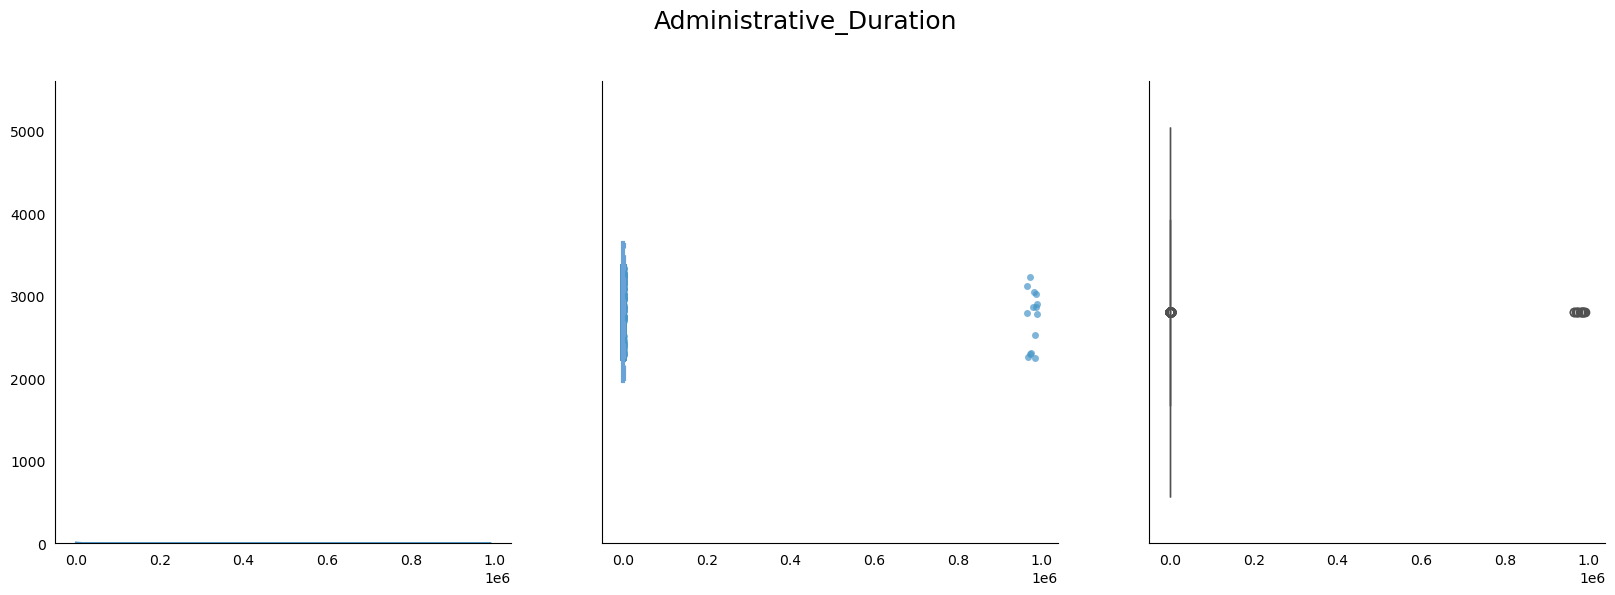

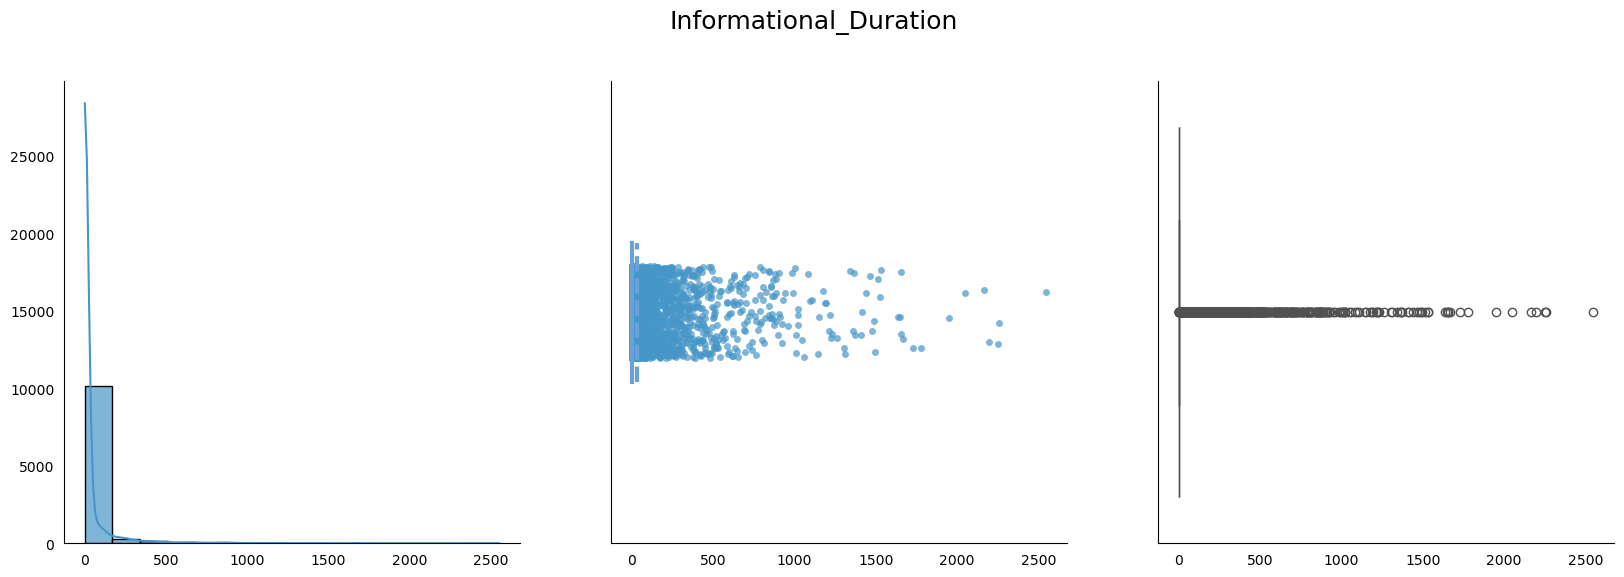

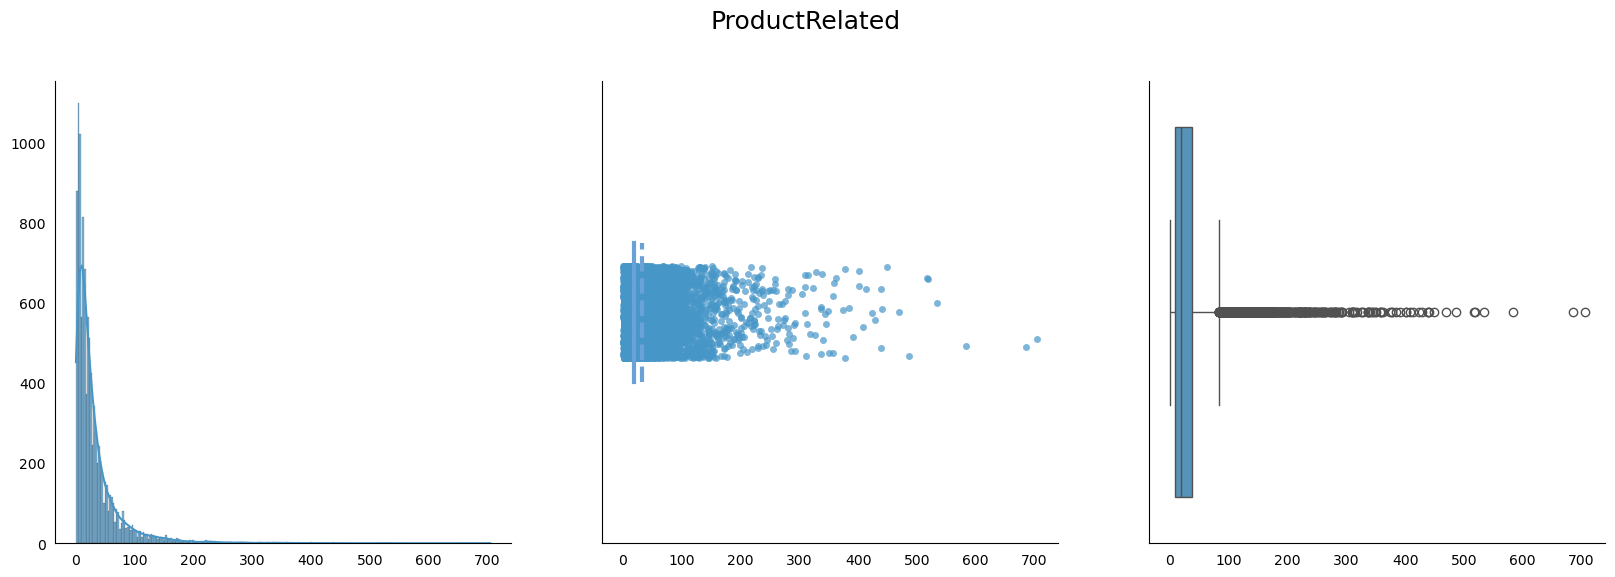

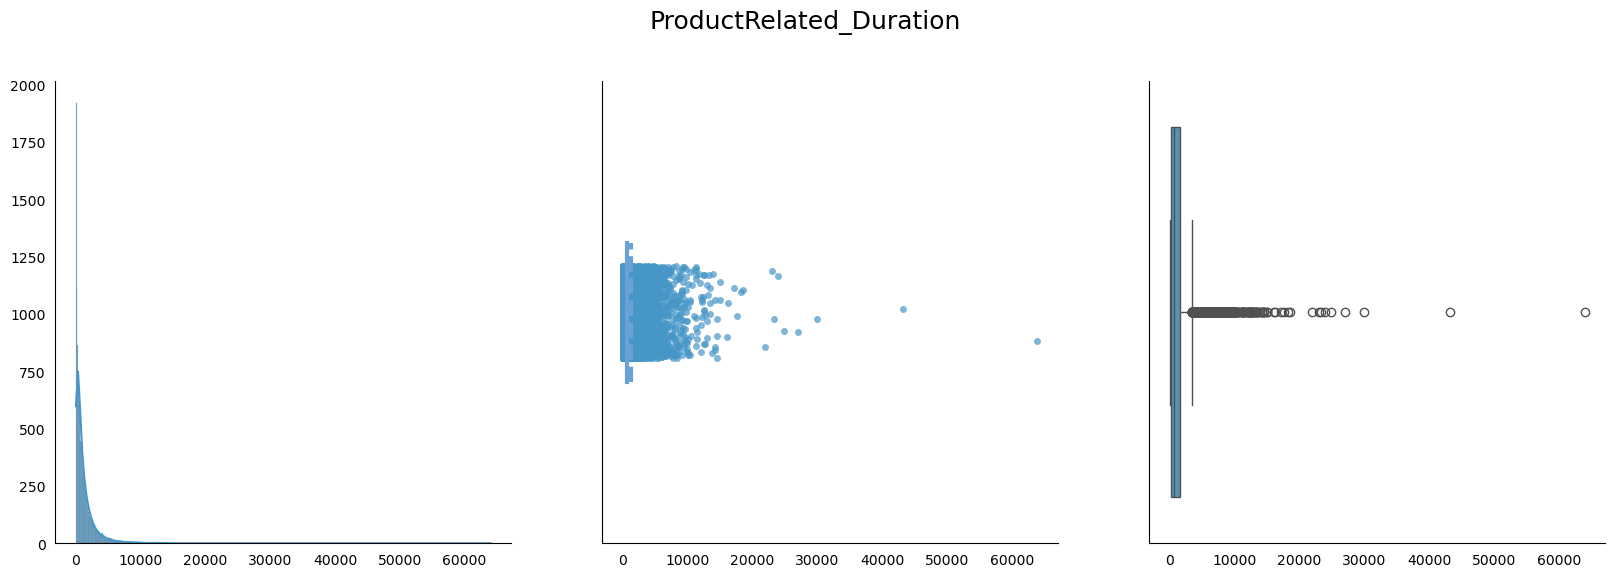

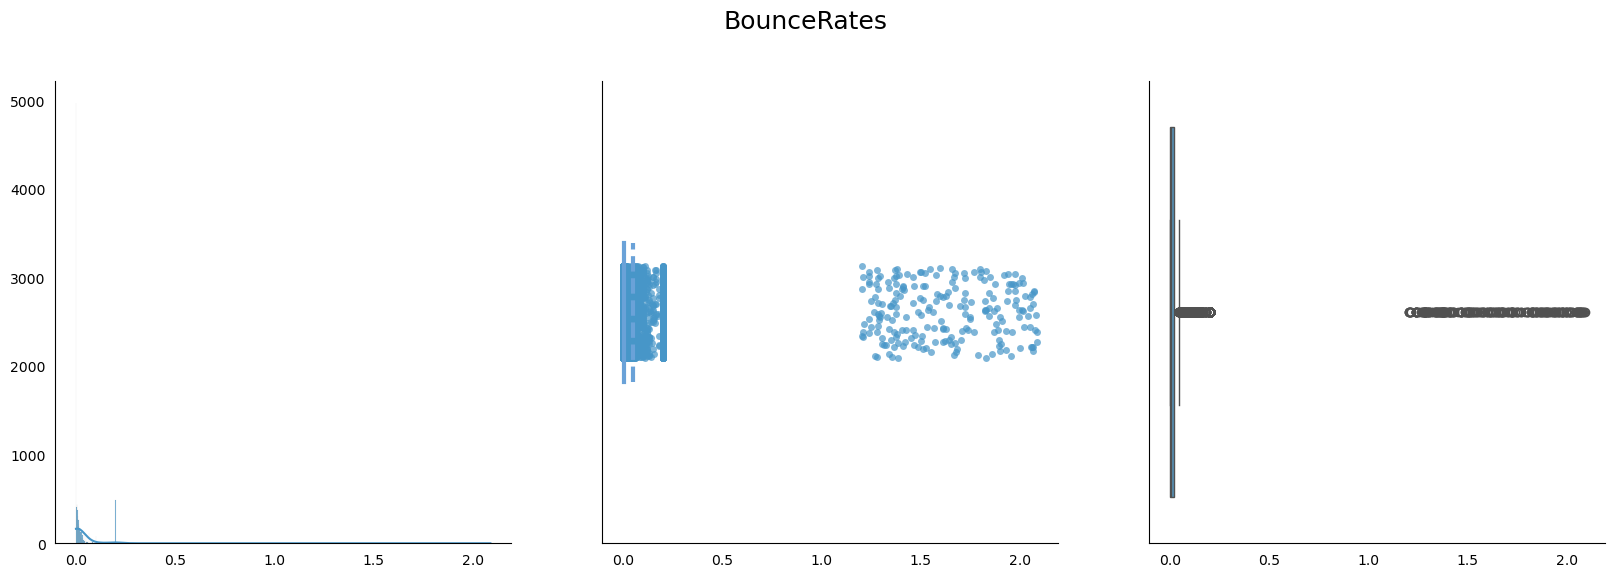

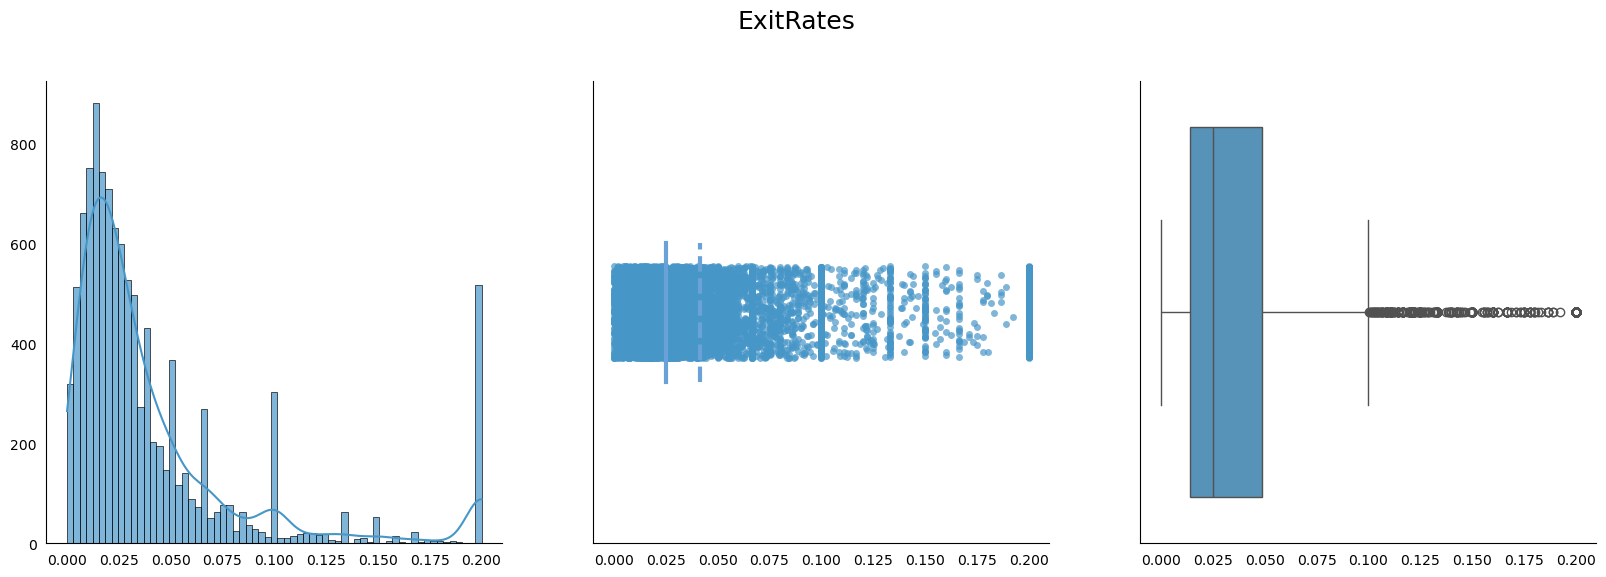

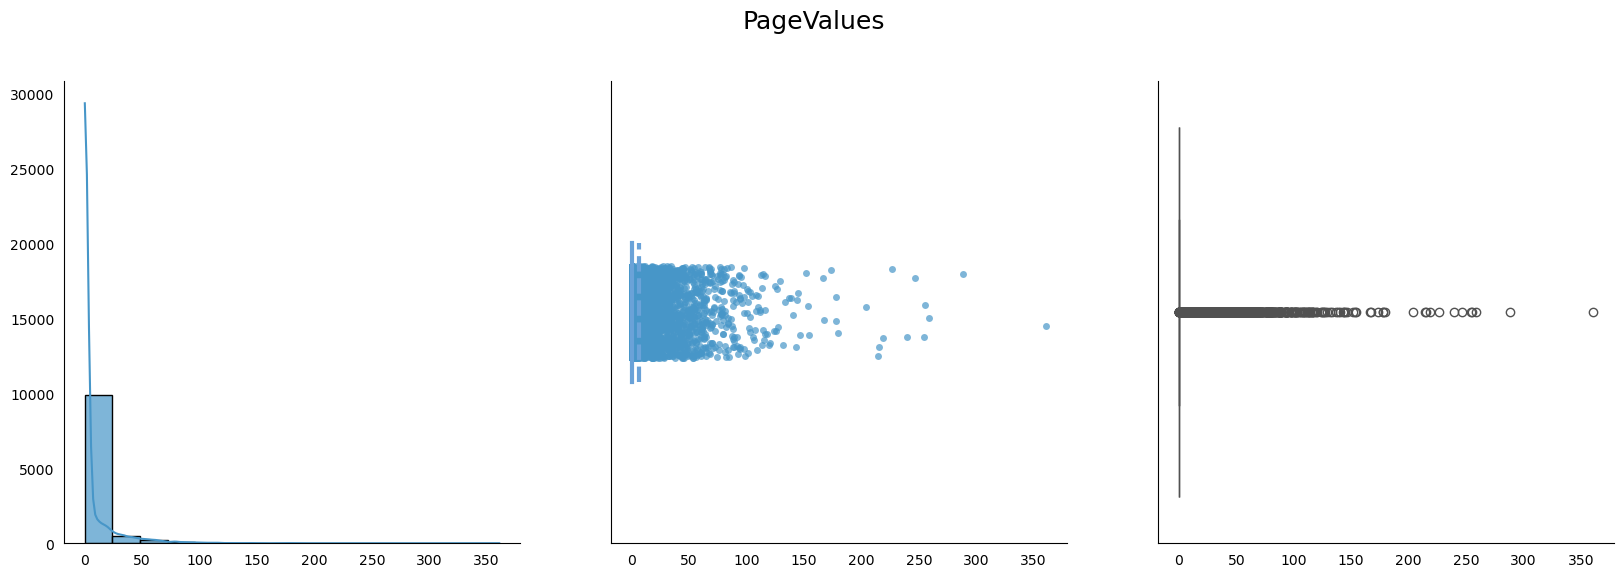

In [30]:
def plot_continuous_features(df):
    """
    Plot histograms, stripplots, and boxplots for continuous features in a DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame.

    Returns
    -------
    list
        A list of continuous features in the DataFrame.
    """
    # Set the color palette
    sns.set_palette(sns.color_palette(["#4796C8"]))

    continuous_features = []

    for i in df.select_dtypes('number').columns:
        if len(df[i].unique()) > 27:  # Condition for continuous features
            continuous_features.append(i)

            fig, ax = plt.subplots(1, 3, figsize=(20, 6))

            # Plots
            sns.histplot(data=df[i], ax=ax[0], kde=True, alpha=0.7)
            sns.stripplot(x=df[i], ax=ax[1], alpha=0.7)
            sns.boxplot(x=df[i], ax=ax[2])

            # Stripplot median and mean line
            median = df[i].median()
            mean = df[i].mean()
            ax[1].axvline(x=median, color='#6AA2D8', linestyle='-', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)  # median
            ax[1].axvline(x=mean, color='#6AA2D8', linestyle='--', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)   # mean

            # Title entire figure
            fig.suptitle(i, fontsize=18, y=1)

            # Hide ticks while keeping labels
            ax[0].tick_params(bottom=False)
            ax[1].tick_params(bottom=False)
            ax[2].tick_params(bottom=False)
            ax[0].tick_params(left=False)
            ax[1].tick_params(left=False)
            ax[2].tick_params(left=False)

            # Hide x and y labels
            ax[0].set(xlabel=None, ylabel=None)
            ax[1].set(xlabel=None, ylabel=None)
            ax[2].set(xlabel=None, ylabel=None)

            sns.despine()

    return continuous_features

continuous_features = plot_continuous_features(df)

#### Exploring Feature Transformations
For this analysis, we will primarily focus on using logarithmic and square root transformations. While the Box-Cox and Yeo-Johnson transformations are powerful techniques for handling skewed data, they may encounter issues with our dataset due to the presence of extremely large values and complex distributions.

Both the Box-Cox and Yeo-Johnson transformations involve raising values to a power determined by an estimated parameter (λ). In some cases, the transformed values may exceed the maximum representable value for the data type, resulting in overflow issues.

To avoid these problems, we will stick with logarithmic and square root transformations, which are less sensitive to extreme values. For more information on the Yeo-Johnson transformation and its comparison to the Box-Cox transformation, please refer to [this resource](https://feaz-book.com/numeric-yeojohnson).

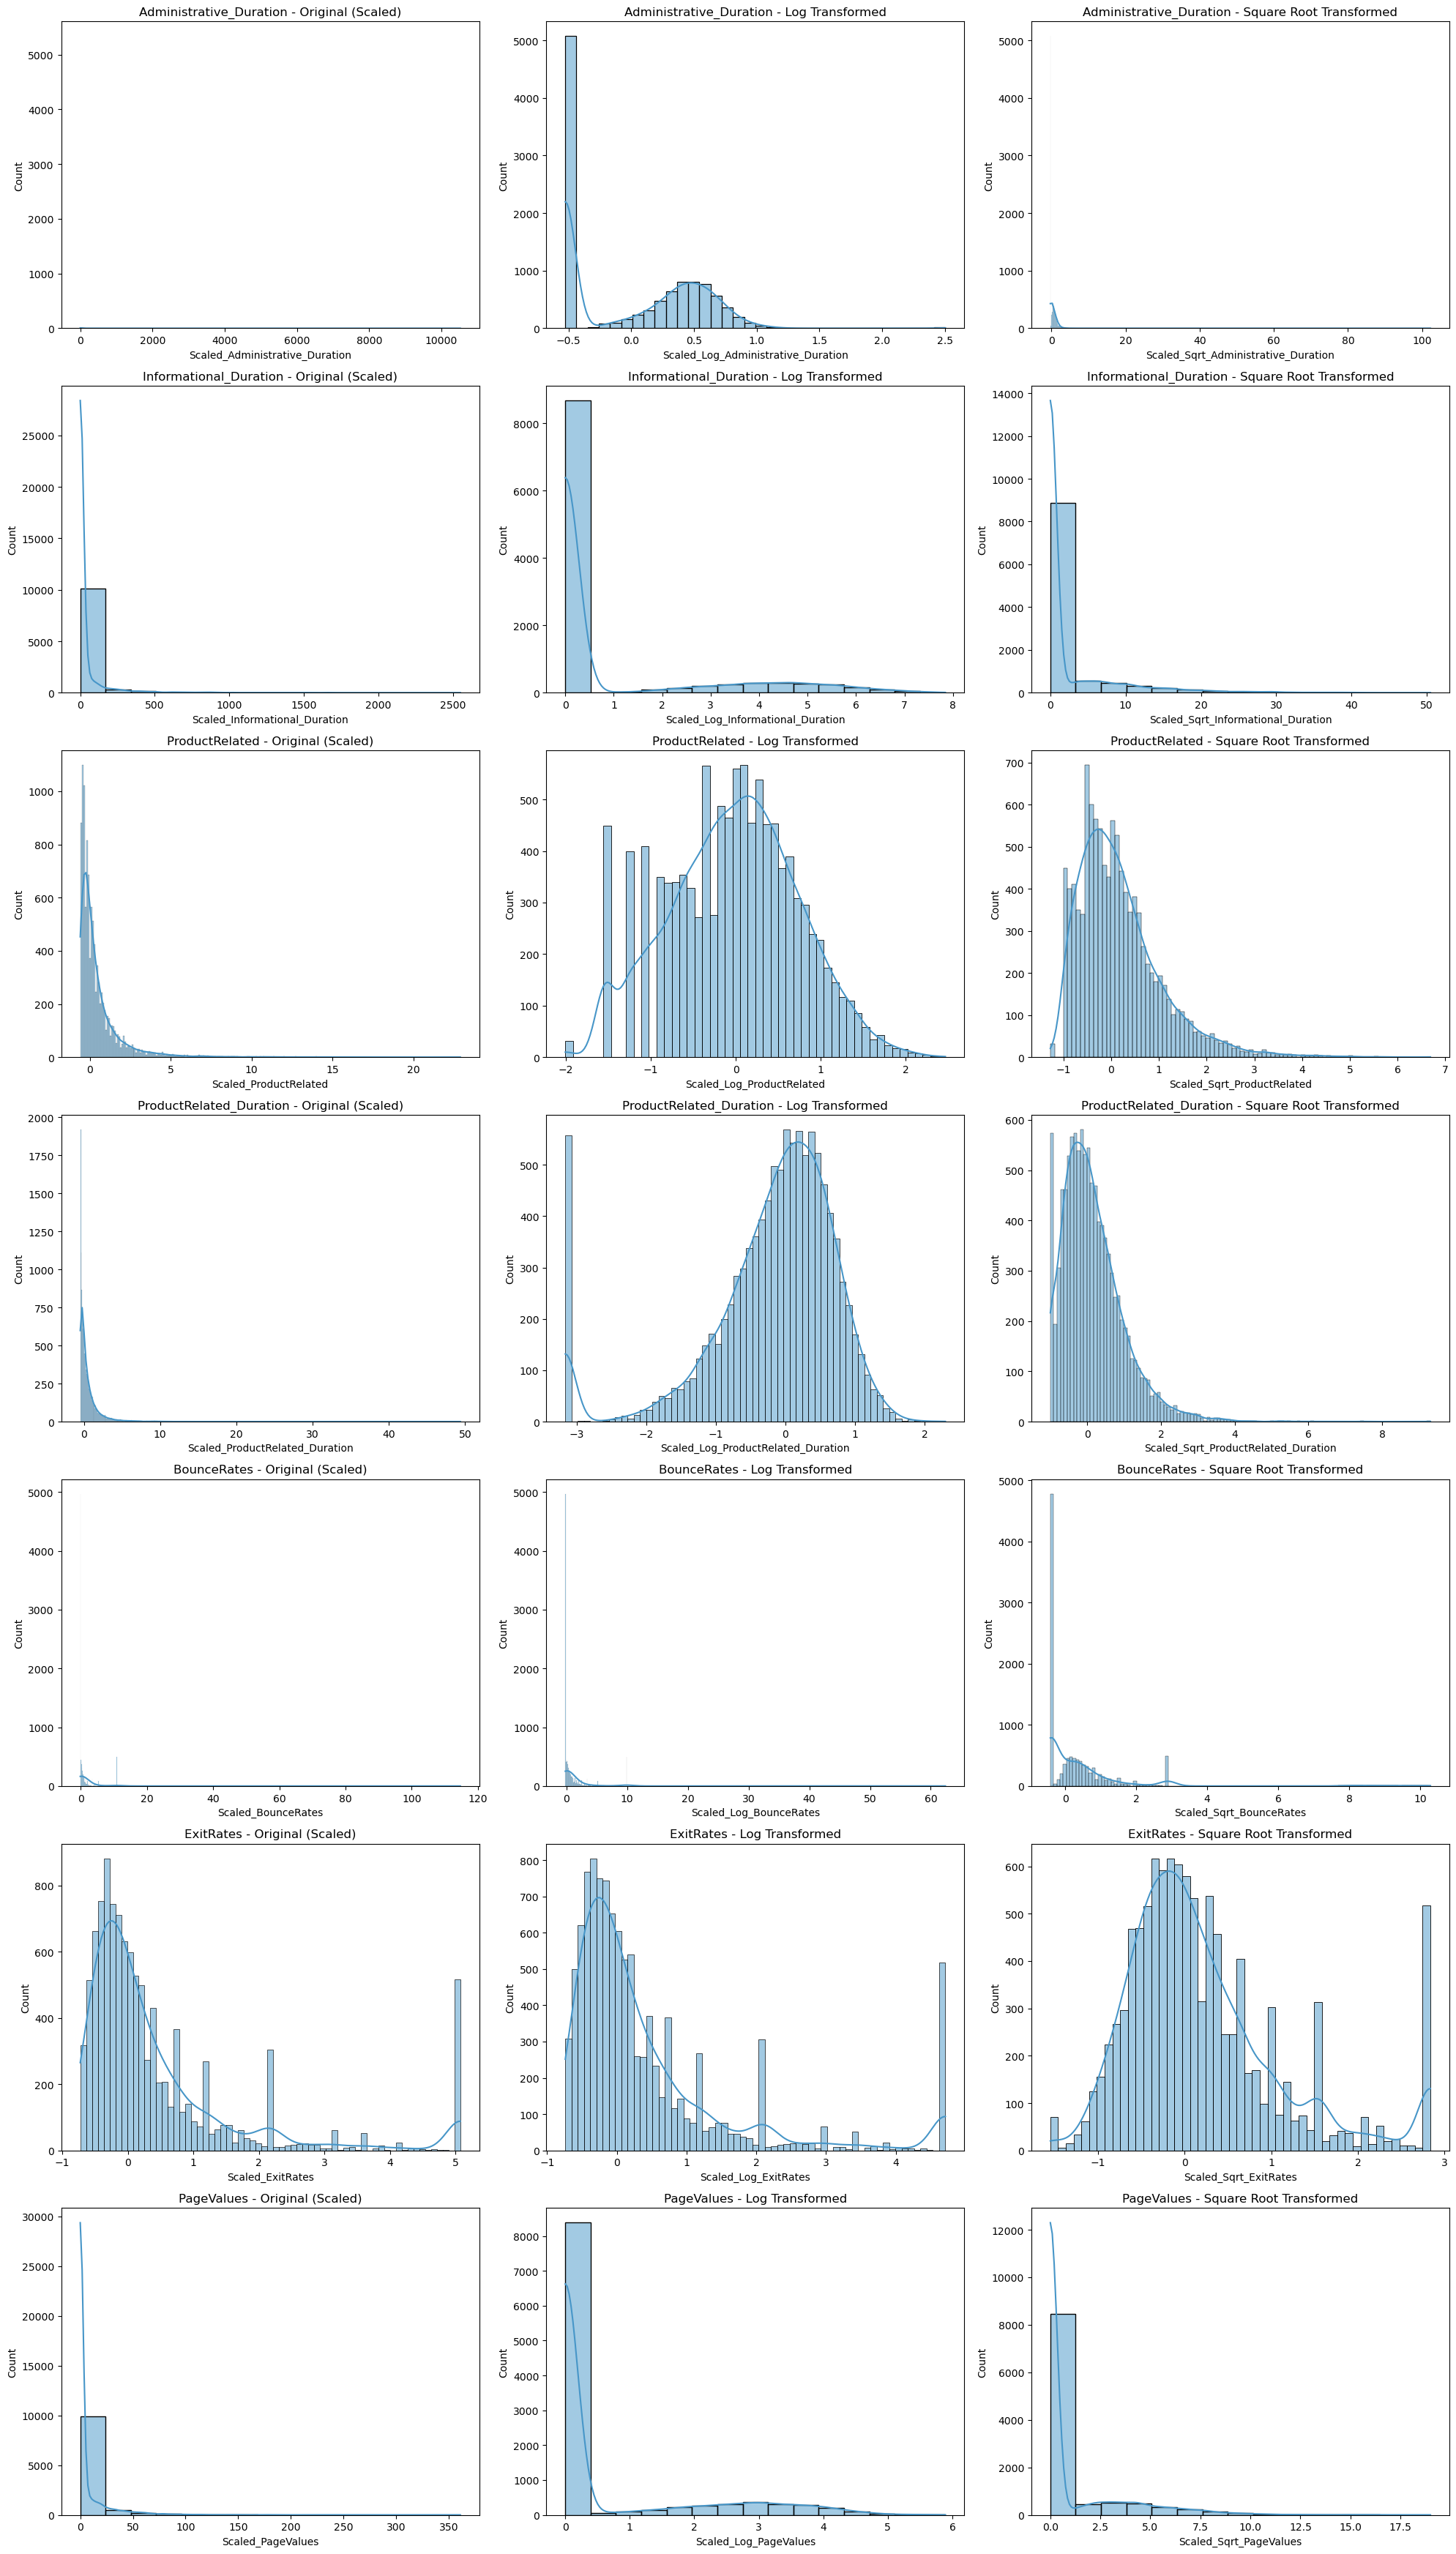

In [42]:
continuous_features = [
 'Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']
from sklearn.preprocessing import RobustScaler, FunctionTransformer, PowerTransformer, MinMaxScaler()

#warnings.filterwarnings(category=RuntimeWarning, action='ignore')

# Create log transformer
log_transformer = FunctionTransformer(np.log1p)

# Create square root transformer
sqrt_transformer = FunctionTransformer(np.sqrt)

# Create a RobustScaler object
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# Create a figure with subplots
fig, axes = plt.subplots(len(continuous_features), 3, figsize=(20, 5 * len(continuous_features)))

df_temp = df.copy()

for i, feature in enumerate(continuous_features):
    # Original distribution
    df_temp[f'Scaled_{feature}'] = robust_scaler.fit_transform(df_temp[[feature]])
    sns.histplot(df_temp[f'Scaled_{feature}'], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} - Original (Scaled)')
    
    # Log transformation
    df_temp[f'Log_{feature}'] = log_transformer.transform(df_temp[[feature]])
    df_temp[f'Scaled_Log_{feature}'] = robust_scaler.fit_transform(df_temp[[f'Log_{feature}']])
    sns.histplot(df_temp[f'Scaled_Log_{feature}'], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} - Log Transformed')
    
    # Square root transformation
    df_temp[f'Sqrt_{feature}'] = sqrt_transformer.transform(df_temp[[feature]])
    df_temp[f'Scaled_Sqrt_{feature}'] = robust_scaler.fit_transform(df_temp[[f'Sqrt_{feature}']])
    sns.histplot(df_temp[f'Scaled_Sqrt_{feature}'], kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f'{feature} - Square Root Transformed')

plt.tight_layout()
plt.show()

#### Optimizing Features for Better Data Distribution

We've developed a targeted feature handling strategy based on thorough analysis of each feature's distribution, outliers, and characteristics. Here's a summary:

| Feature                 | Distribution   | Outliers      | Transformation | Scaler        |
|-------------------------|----------------|---------------|----------------|---------------|
| Administrative_Duration | Right-skewed   | Significant   | Logarithmic    | RobustScaler  |
| Informational_Duration  | Right-skewed   | Significant   | Square Root    | RobustScaler  |
| ProductRelated          | Right-skewed   | Significant   | Logarithmic    | RobustScaler  |
| ProductRelated_Duration | Right-skewed   | Significant   | Logarithmic    | RobustScaler  |
| BounceRates             | Right-skewed   | Significant   | Square Root    | RobustScaler  |
| ExitRates               | Right-skewed   | Significant   | Square Root    | RobustScaler  |
| PageValues              | Right-skewed   | Significant   | Square Root    | RobustScaler  |

By comparing the transformed features in the visual below with the originals, we can observe several notable improvements, despite the remaining challenges:

- Reduced skewness
- Revealed data clusters
- Improved outlier handling
- Better interpretability

Some previously unworkable features are now 'usable'. RobustScaler is the clear choice for handling our many outliers while preserving data structure.

These optimizations will lead to more accurate and meaningful results in our modeling and analysis.

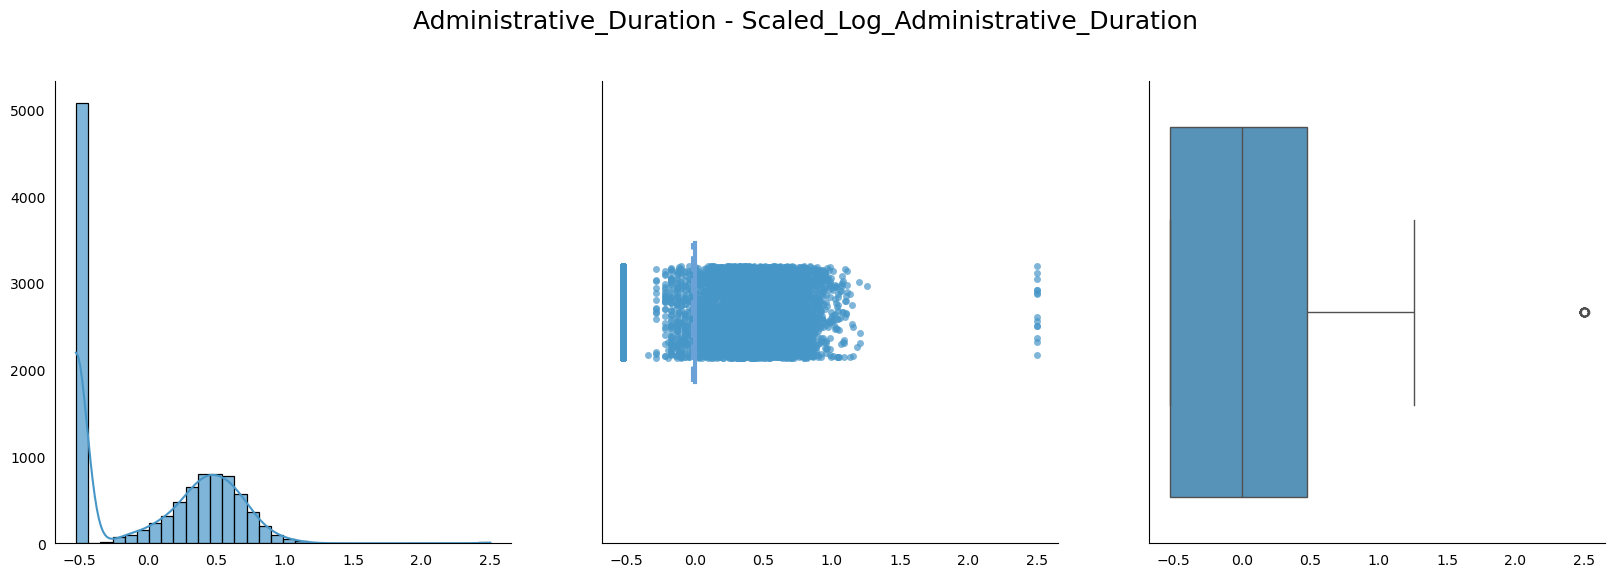

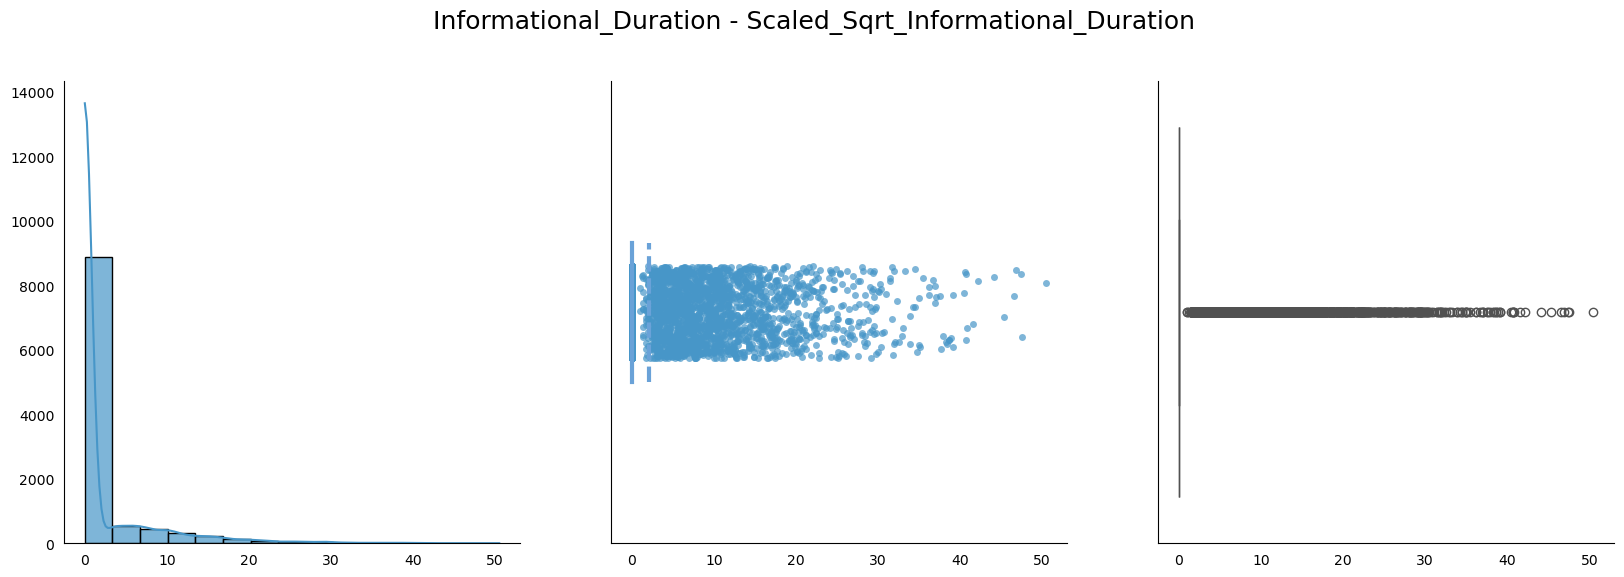

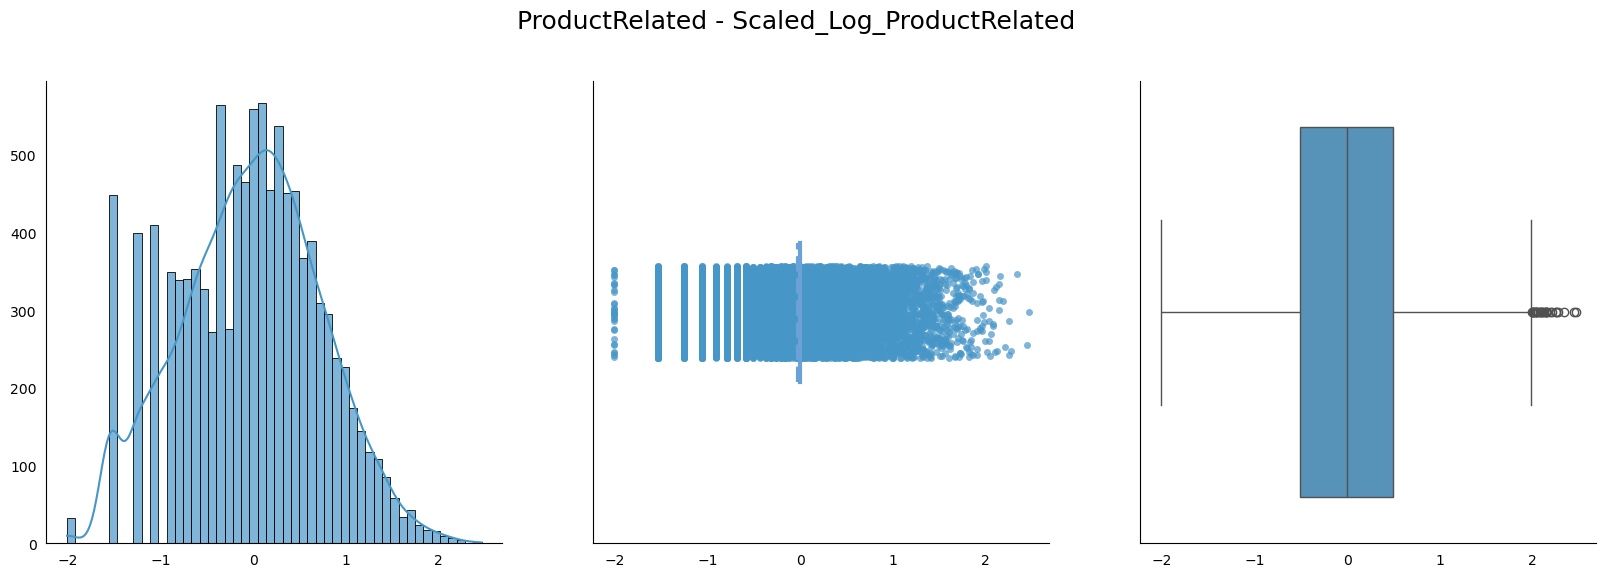

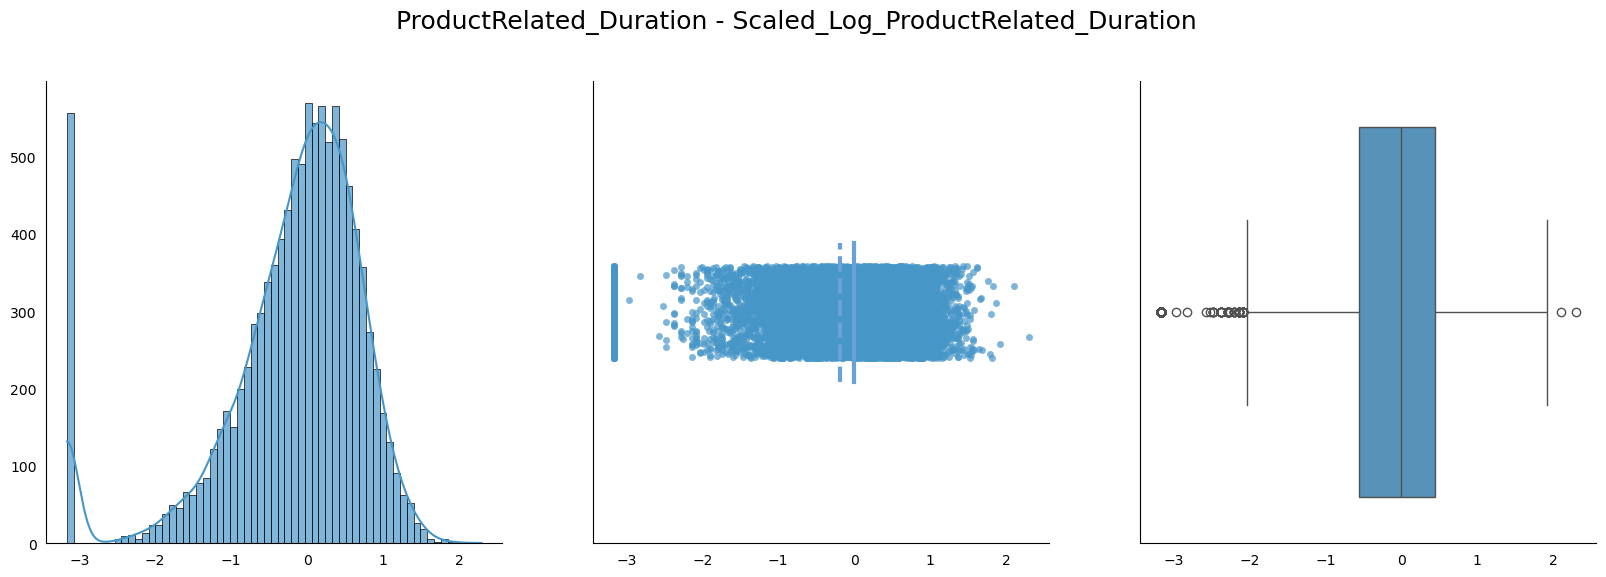

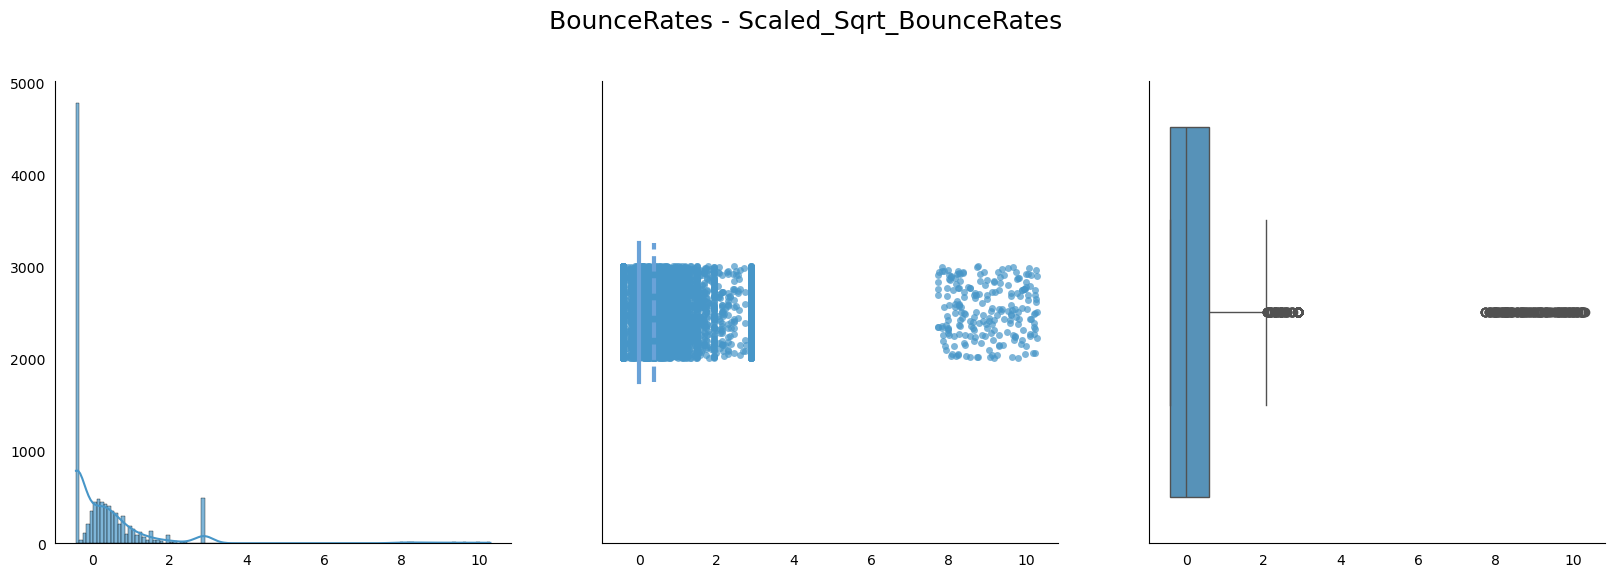

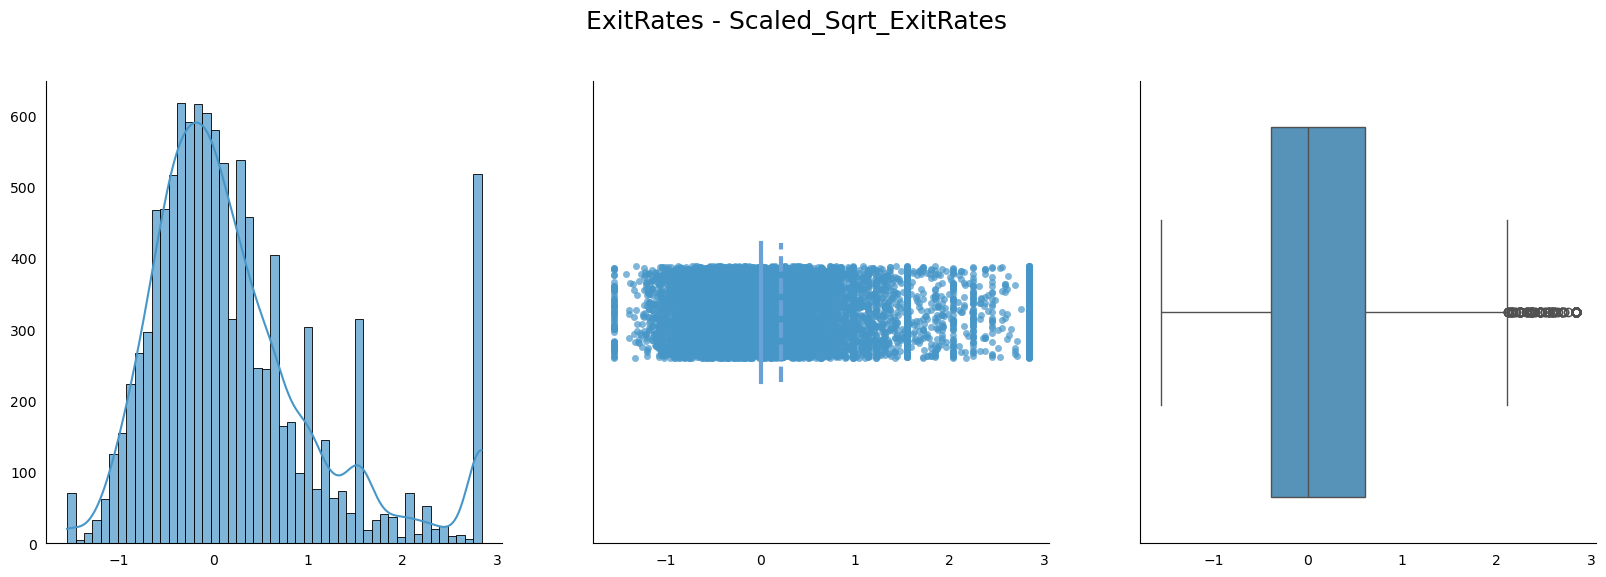

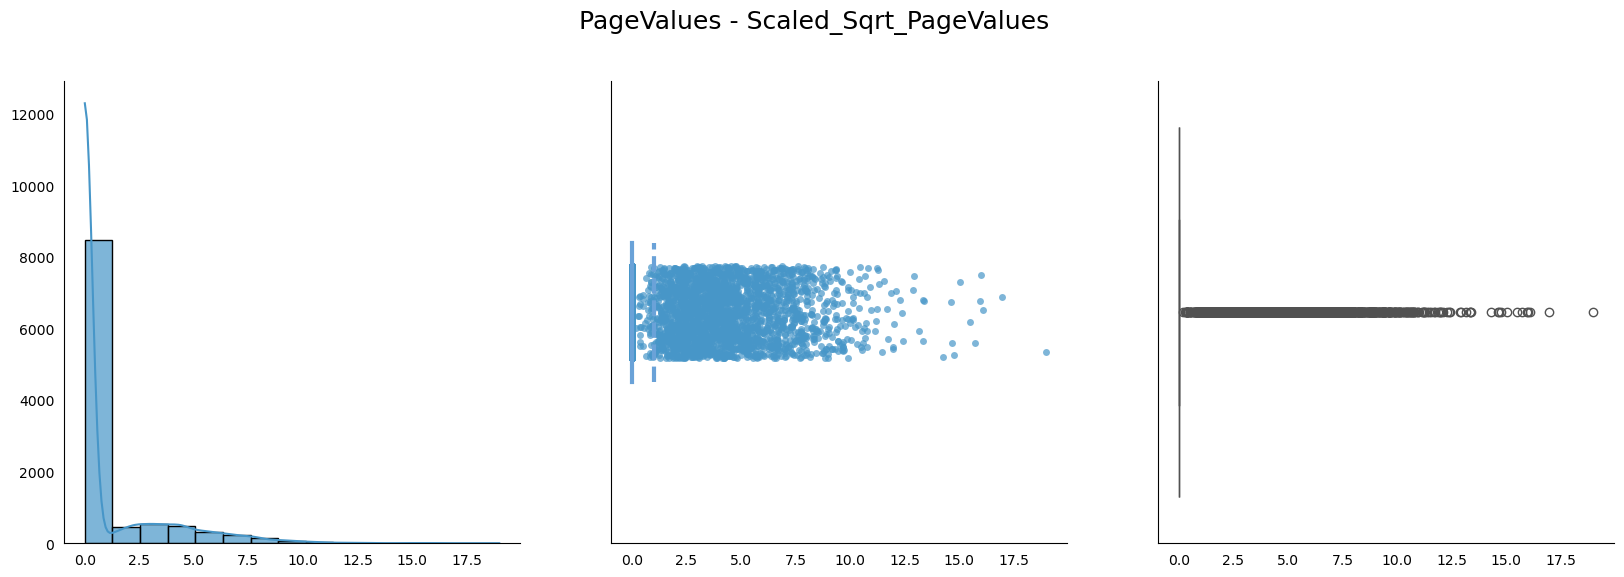

In [44]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Set the color palette
sns.set_palette(sns.color_palette(["#4796C8"]))

engineered_features = {
    'Administrative_Duration': 'Scaled_Log_Administrative_Duration',
    'Informational_Duration': 'Scaled_Sqrt_Informational_Duration',
    'ProductRelated': 'Scaled_Log_ProductRelated',
    'ProductRelated_Duration': 'Scaled_Log_ProductRelated_Duration',
    'BounceRates': 'Scaled_Sqrt_BounceRates',
    'ExitRates': 'Scaled_Sqrt_ExitRates',
    'PageValues': 'Scaled_Sqrt_PageValues'
}

for feature, engineered_feature in engineered_features.items():
    if len(df_temp[engineered_feature].unique()) > 25:  # Condition for continuous features
        fig, ax = plt.subplots(1, 3, figsize=(20, 6))

        # Plots
        sns.histplot(data=df_temp[engineered_feature], ax=ax[0], kde=True, alpha=0.7)
        sns.stripplot(x=df_temp[engineered_feature], ax=ax[1], alpha=0.7)
        sns.boxplot(x=df_temp[engineered_feature], ax=ax[2])

        # Stripplot median and mean line
        median = df_temp[engineered_feature].median()
        mean = df_temp[engineered_feature].mean()
        ax[1].axvline(x=median, color='#6AA2D8', linestyle='-', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)  # median
        ax[1].axvline(x=mean, color='#6AA2D8', linestyle='--', linewidth=3, ymin=0.35, ymax=0.65, zorder=3)   # mean

        # Title entire figure
        fig.suptitle(f"{feature} - {engineered_feature}", fontsize=18, y=1)

        # Hide ticks while keeping labels
        ax[0].tick_params(bottom=False)
        ax[1].tick_params(bottom=False)
        ax[2].tick_params(bottom=False)
        ax[0].tick_params(left=False)
        ax[1].tick_params(left=False)
        ax[2].tick_params(left=False)

        # Hide x and y labels
        ax[0].set(xlabel=None, ylabel=None)
        ax[1].set(xlabel=None, ylabel=None)
        ax[2].set(xlabel=None, ylabel=None)

        sns.despine()

In [50]:
categorical_features

['Month',
 'VisitorType',
 'Informational',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'Revenue']

### Categorical Features Frequencies
No sparse sub-categories observed in the provided categorical features.

| Feature                 | Category Frequencies                                    | Sparse Subcategories    | Encoding Technique      |
|-------------------------|---------------------------------------------------------|-------------------------|-------------------------|
| Month                   | Relatively balanced, higher in Mar-May and Sept-Oct     | None                    | One-Hot Encoding        |
| VisitorType             | Highly imbalanced, majority are Returning_Visitor       | None                    | One-Hot Encoding        |
| Informational           | Highly imbalanced, majority have 0 informational pages  | None                    | One-Hot Encoding        |
| SpecialDay              | Highly imbalanced, majority have 0.0 special day value  | None                    | One-Hot Encoding        |
| OperatingSystems        | Imbalanced, majority use OS 2 and 3                     | None                    | One-Hot Encoding        |
| Browser                 | Imbalanced, majority use Browser 2 and 1                | None                    | One-Hot Encoding        |
| Region                  | Imbalanced, majority from Region 1                      | None                    | One-Hot Encoding        |
| TrafficType             | Imbalanced, majority are TrafficType 1                  | None                    | One-Hot Encoding        |
| Weekend                 | Imbalanced, majority are not during weekend             | None                    | One-Hot Encoding        |
| Revenue                 | Highly imbalanced, vast majority did not generate revenue | None                    | Target variable         |

Based on the observations from the provided categorical feature visualizations:

1. Month: The distribution is relatively balanced across months, with slightly higher frequencies in March to May and September to October.

2. VisitorType: The vast majority of visitors are "Returning_Visitor", with "New_Visitor" and "Other" being much less frequent. 

3. Informational: Most sessions have 0 informational pages viewed, with frequencies decreasing rapidly as the number of informational pages increases.

4. SpecialDay: The vast majority of sessions have a special day value of 0.0, with very few sessions having higher special day values.

5. OperatingSystems: The distribution is imbalanced, with the majority of users using operating systems 2 and 3.

6. Browser: Most users use browser 2, followed by browser 1. Other browser categories have much lower frequencies.

7. Region: The majority of users are from Region 1, with other regions having significantly lower representation.

8. TrafficType: TrafficType 1 dominates the distribution, with other traffic types being much less frequent.

9. Weekend: Most sessions are not during the weekend, with a smaller proportion occurring on weekends.

10. Revenue: The vast majority of sessions did not generate revenue, indicating a highly imbalanced target variable.

No sparse sub-categories (categories with very few observations) were observed in the provided categorical features. One-hot encoding would be suitable for features used as model inputs, while the Revenue feature serves as the target variable.

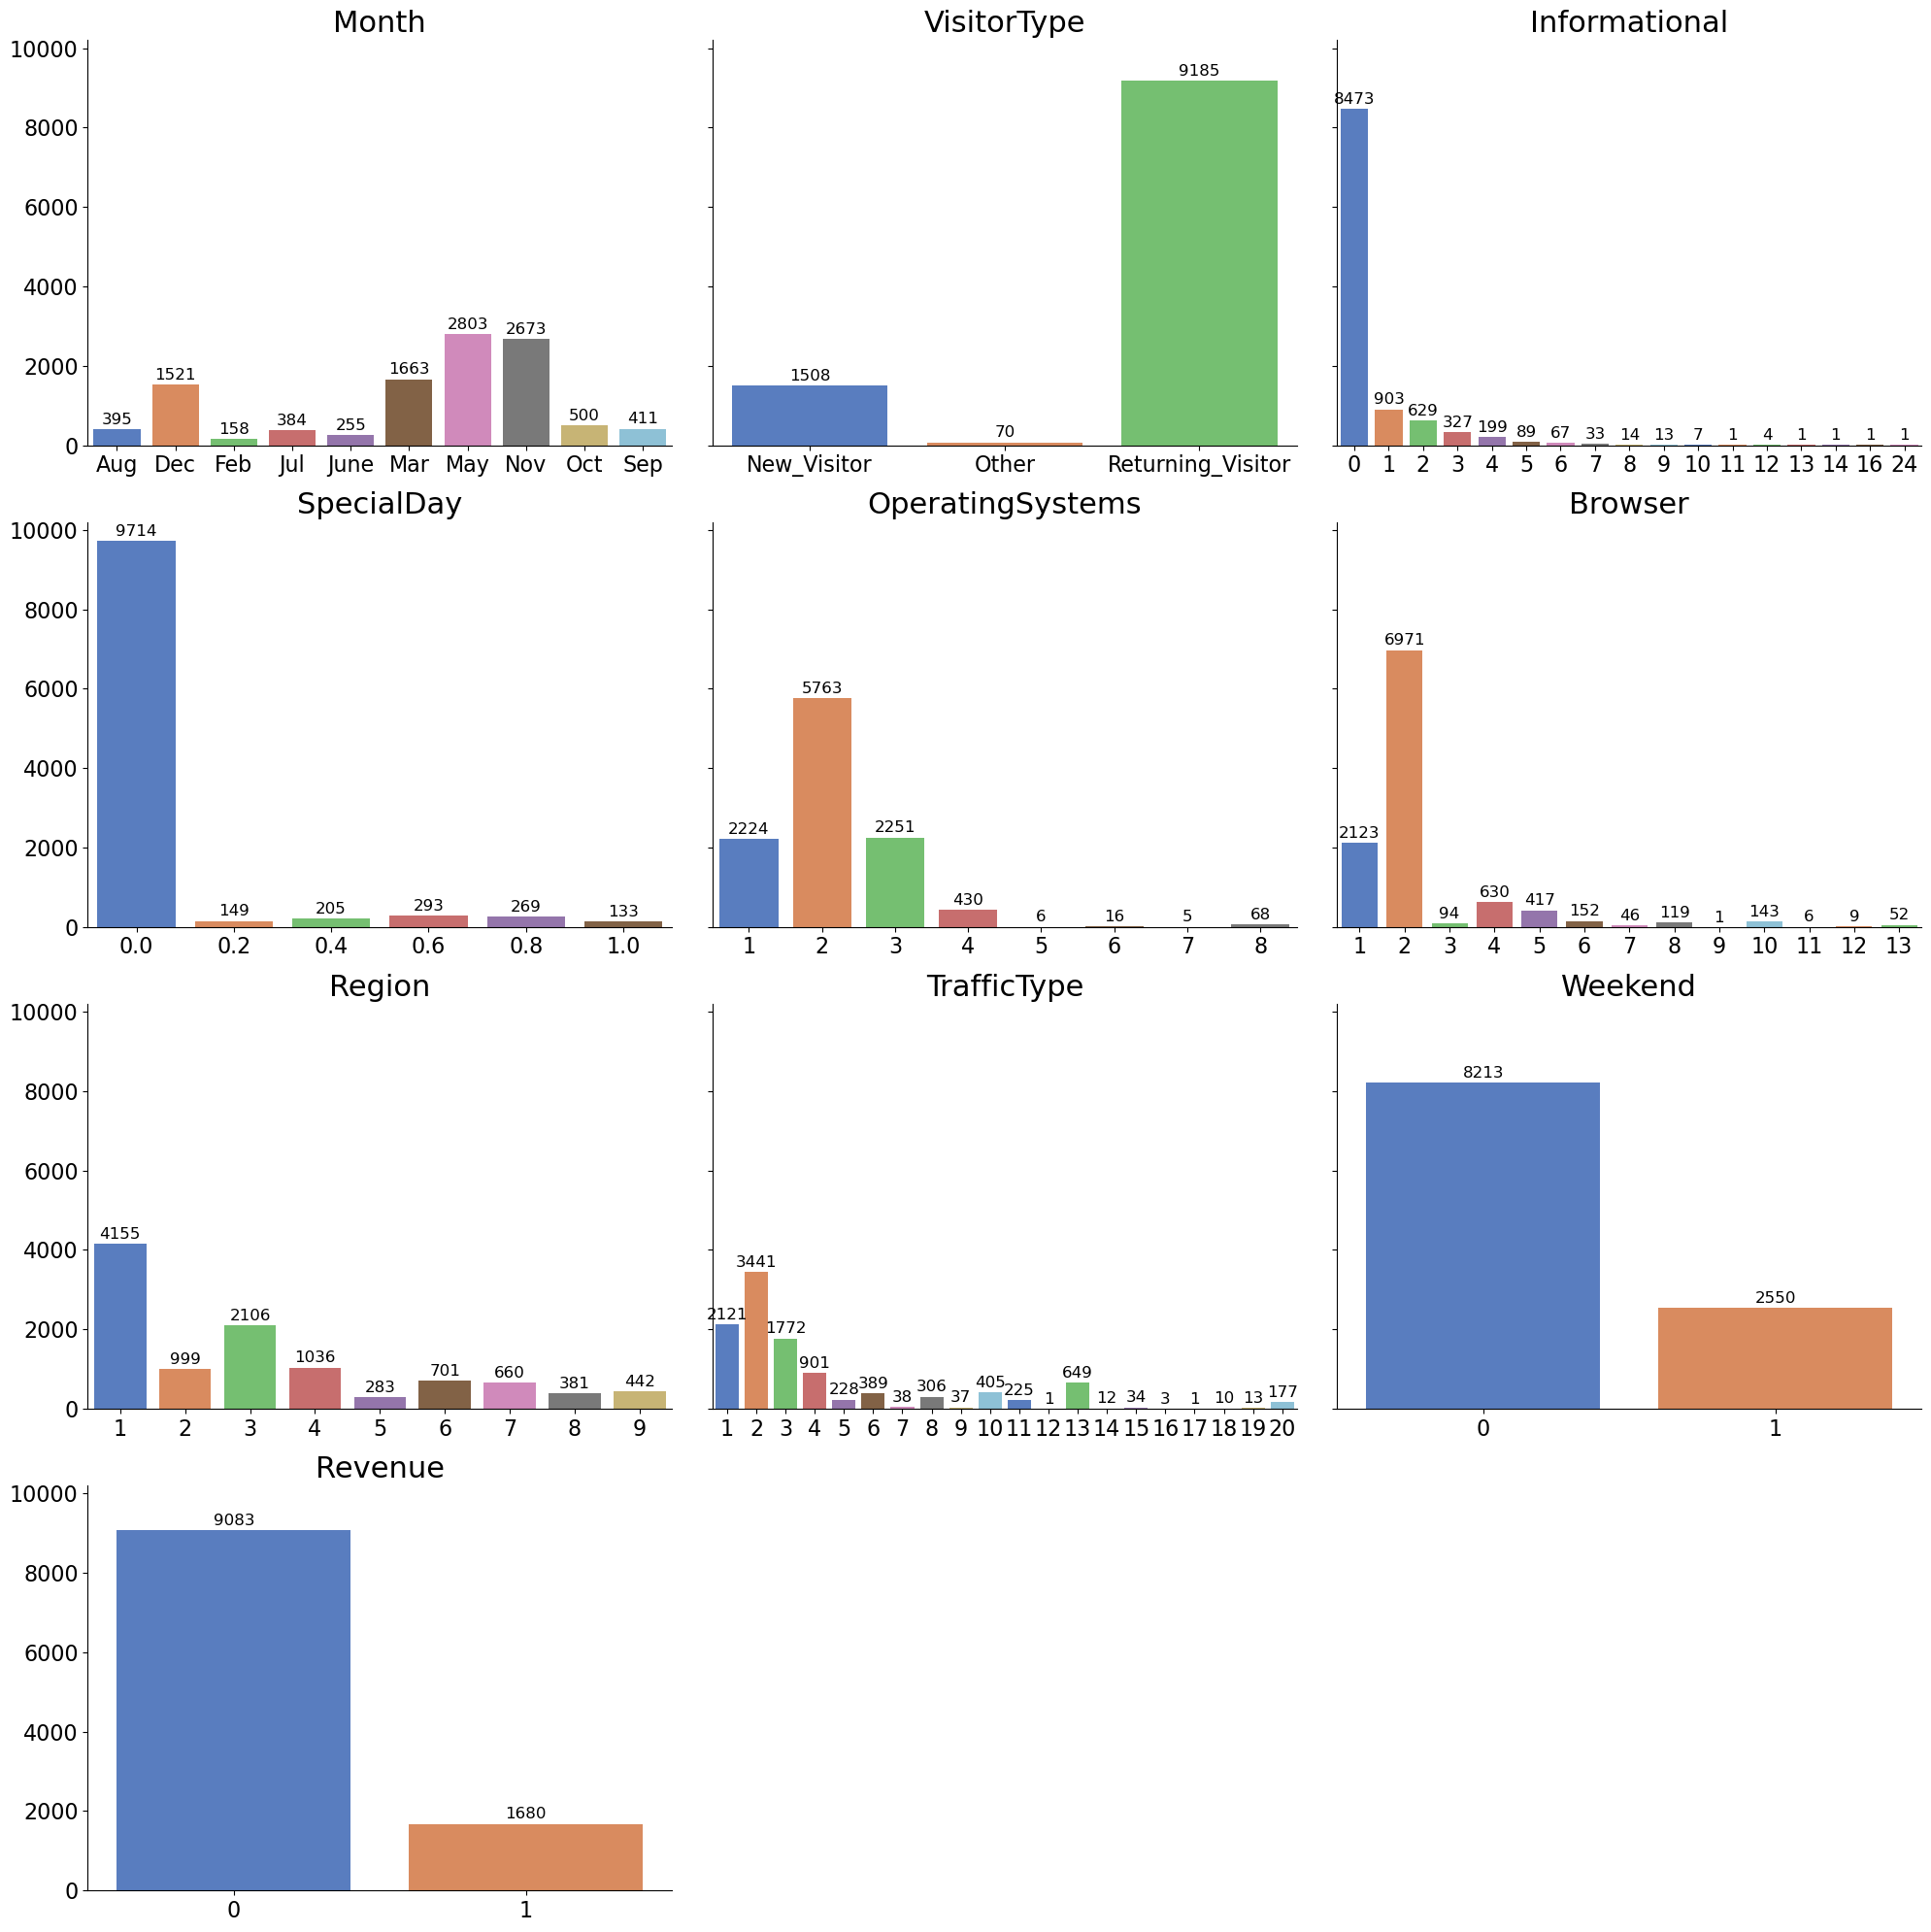

In [49]:
import math

# Suppress user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Set color palette
custom_palette = sns.color_palette("muted")

# Select object, category, and boolean columns, and numerical columns with fewer than 25 unique values
categorical_features = df.select_dtypes(include=['object', "category", "bool"]).columns.tolist() + \
    [col for col in df.select_dtypes(include=np.number).columns if df[col].nunique() <= 25]

rows = math.ceil(len(categorical_features) / 3)  # Calculate the number of rows required

# Create a grid of subplots
fig, axs = plt.subplots(rows, 3, figsize=(20, 5 * rows), sharey=True)

for i, ax in zip(categorical_features, axs.flat):
    # Order bars by count
    #order = df[i].value_counts().index
    
    # Plotting
    sns_plot = sns.countplot(data=df, x=i, ax=ax, palette=custom_palette)  # Adjust palette size dynamically: , palette=custom_palette[:len(order)]
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=16)
    
    ax.tick_params(axis='y', labelsize=16)  # Adjust y-tick label size
    
    # Annotate bars
    for p in sns_plot.patches:
        sns_plot.annotate(format(p.get_height(), '.0f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', 
                          va = 'center', 
                          xytext = (0, 7), 
                          textcoords = 'offset points',
                          fontsize=12)

    ax.set_title(i, fontsize=22)
    sns.despine()

# Hide any unused subplots
for ax in axs.flat[len(categorical_features):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


In [19]:
def analyze_df(df, target_col=None):
    print(f"Data shape: {df.shape}\n")
    print("df.info():\n")
    print(df.info())
    print("\ndf.head():\n")
    print(df.head())
    print("\ndf.describe():\n")
    print(df.describe())
    print("\ndf.describe(include=['category', 'object']):\n")
    print(df.describe(include=['category', 'object']))
    print("\nCorrelation matrix:\n")
    print(df.corr(numeric_only=True))
    missing_values = df.isnull().sum()
    print("\nMissing values per column:\n")
    print(missing_values)
    print("\nPercentage of missing values per column:\n")
    print(missing_values / len(df) * 100)
    print("\nUnique values per column:\n")
    print(df.nunique())
    print("\nValue counts for categorical columns:\n")
    for col in df.select_dtypes(include=['category', 'object']).columns:
        print(f"{col}:\n{df[col].value_counts()}\n")
    print("Mode of categorical columns:\n")
    print(df.select_dtypes(include=['category', 'object']).mode())
    print("\nMost frequent category in categorical columns:\n")
    for col in df.select_dtypes(include=['category', 'object']).columns:
        print(f"{col}: {df[col].mode().values[0]}, count: {df[col].value_counts().values[0]}")
    print("\nLeast frequent category in categorical columns:\n")
    for col in df.select_dtypes(include=['category', 'object']).columns:
        print(f"{col}: {df[col].value_counts().idxmin()}, count: {df[col].value_counts().values[-1]}")
    print("\nRange of numerical columns:\n")
    for col in df.select_dtypes(include=np.number).columns:
        print(f"{col}: {df[col].min()} - {df[col].max()}")
    print("\nSkewness of numerical columns:\n")
    print(df.select_dtypes(include=np.number).skew())
    print("\nKurtosis of numerical columns:\n")
    print(df.select_dtypes(include=np.number).kurt())
    print("\nOutliers in numerical columns:\n")
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f"{col}: {((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()} outliers")
    print("\nDuplicated rows:\n")
    print(df.duplicated().sum())
    if target_col:
        print(f"\nDistribution of target variable ({target_col}):\n")
        print(df[target_col].value_counts())

analyze_df(df, target_col="Revenue")

Data shape: (12091, 18)

df.info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12091 entries, 0 to 12090
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11969 non-null  float64
 1   Administrative_Duration  12091 non-null  float64
 2   Informational            12091 non-null  int64  
 3   Informational_Duration   12091 non-null  float64
 4   ProductRelated           12091 non-null  int64  
 5   ProductRelated_Duration  12091 non-null  float64
 6   BounceRates              11734 non-null  float64
 7   ExitRates                12091 non-null  float64
 8   PageValues               12091 non-null  float64
 9   SpecialDay               11969 non-null  float64
 10  Month                    11923 non-null  object 
 11  OperatingSystems         12091 non-null  int64  
 12  Browser                  11909 non-null  float64
 13  Region                   11847 non-null